<a href="https://colab.research.google.com/github/AidenLiuSH/S-P-500-Forecast/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
#S&P 500 closing price prediction using Long Short Term Memory

In [74]:
!pip install yfinance

In [75]:
#import libraries
import yfinance as yf
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [76]:
#import S&P 500 historical data from 2012-01-01 to 2019-12-17
df = yf.download('^GSPC', start='2012-01-01', end='2019-12-17')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1258.859985,1284.619995,1258.859985,1277.060059,1277.060059,3943710000
2012-01-04,1277.030029,1278.729980,1268.099976,1277.300049,1277.300049,3592580000
2012-01-05,1277.300049,1283.050049,1265.260010,1281.060059,1281.060059,4315950000
2012-01-06,1280.930054,1281.839966,1273.339966,1277.810059,1277.810059,3656830000
2012-01-09,1277.829956,1281.989990,1274.550049,1280.699951,1280.699951,3371600000
...,...,...,...,...,...,...
2019-12-10,3135.360107,3142.120117,3126.090088,3132.520020,3132.520020,3343790000
2019-12-11,3135.750000,3143.979980,3133.209961,3141.629883,3141.629883,3252540000
2019-12-12,3141.229980,3176.280029,3138.469971,3168.570068,3168.570068,3990690000


In [77]:
#Get the number of rows and columns in the data set
df.shape

(2002, 6)

<function matplotlib.pyplot.show>

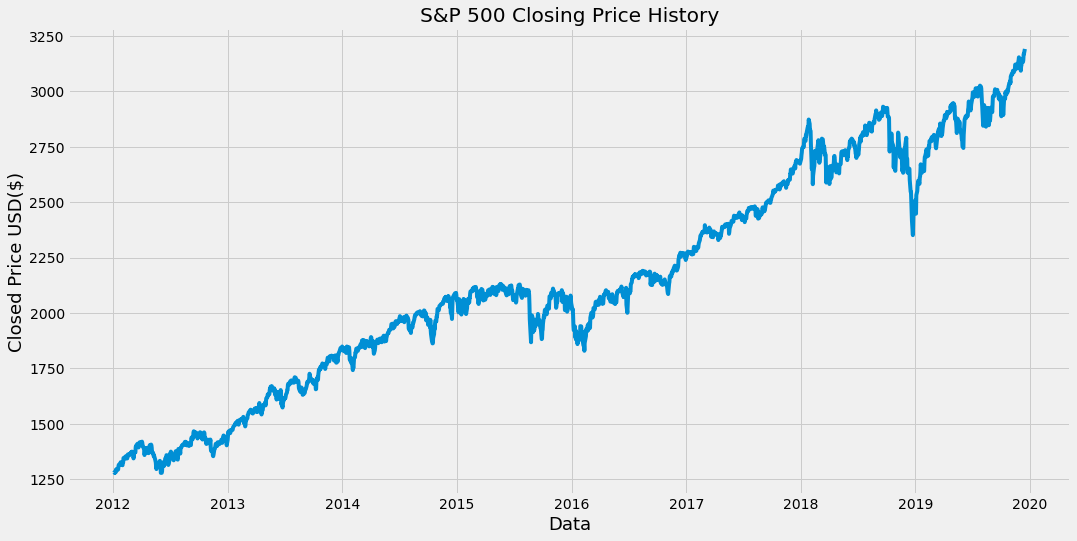

In [78]:
#Visualize S&P 500 Closing Price History from 2012-01-01 to 2019-12-17
plt.figure(figsize=(16,8))
plt.title('S&P 500 Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Closed Price USD($)', fontsize=18)
plt.show

In [79]:
#Create new dataframe with only closed column
data = df.filter(['Close'])
#Convert dataframe to a numpy array
dataset = data.values
#compute the number of rows to train LSTM model using 80% of data
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1602

In [80]:
#Scale the data(preprocessing input data)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00000000e+00],
       [1.25361211e-04],
       [2.08943853e-03],
       ...,
       [9.88048473e-01],
       [9.88168605e-01],
       [1.00000000e+00]])

In [81]:
#Create training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = [] #independent variablees
y_train = [] #dependent variables(target)

for i in range (60, len(train_data)):
  x_train.append(train_data[i-60: i, 0]) #training values
  y_train.append(train_data[i, 0]) #value to predict
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.        , 0.00012536, 0.00208944, 0.00039177, 0.00190133,
       0.00784579, 0.00805474, 0.00963228, 0.00628394, 0.00867639,
       0.01618269, 0.01955711, 0.02001679, 0.02034065, 0.01963548,
       0.02559562, 0.02161002, 0.02051301, 0.0187788 , 0.0184654 ,
       0.02456653, 0.02532398, 0.03543686, 0.03513908, 0.03655995,
       0.03807997, 0.03911946, 0.03425632, 0.03902547, 0.03836206,
       0.0345645 , 0.04230067, 0.04396697, 0.04447887, 0.04210217,
       0.04513182, 0.04632282, 0.04728917, 0.04968685, 0.04629151,
       0.05068451, 0.0483548 , 0.04558627, 0.03463241, 0.03947469,
       0.04641164, 0.04900252, 0.04911743, 0.06210328, 0.06123098,
       0.06557698, 0.06639713, 0.06931187, 0.0671023 , 0.06572849,
       0.06044744, 0.06270924, 0.07284303, 0.07075882, 0.06711276])]
[0.06593221746127353]

[array([0.        , 0.00012536, 0.00208944, 0.00039177, 0.00190133,
       0.00784579, 0.00805474, 0.00963228, 0.00628394, 0.00867639,
       0.01618269, 0.01955711, 0.02

In [82]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [83]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1542, 60, 1)

In [84]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(75))
model.add(Dense(1))

In [85]:
#Complie the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [86]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1542/1542 [==============================] - 53s 32ms/step - loss: 0.0017


In [87]:
#Create testing data set
#Create new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create thee data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :] #values to predict
#create x_test
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [88]:
#Convert the data into a numpy array
x_test = np.array(x_test)

In [89]:
#Reshape the data to 3d shape for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [90]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #unscaling
#Predictions should be equal to y_test

In [91]:
#Get root mean squared error(RMSE) to see the accuracy of the model
rmse = np.sqrt(np.mean(predictions - y_test)**2)
#Get root mean squareed percentage error
#rmspe = (np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))) * 100
rmspe = (np.sqrt(np.mean(np.square((y_test - predictions) / y_test)))) * 100
rmse

8.14071044921875

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<function matplotlib.pyplot.show>

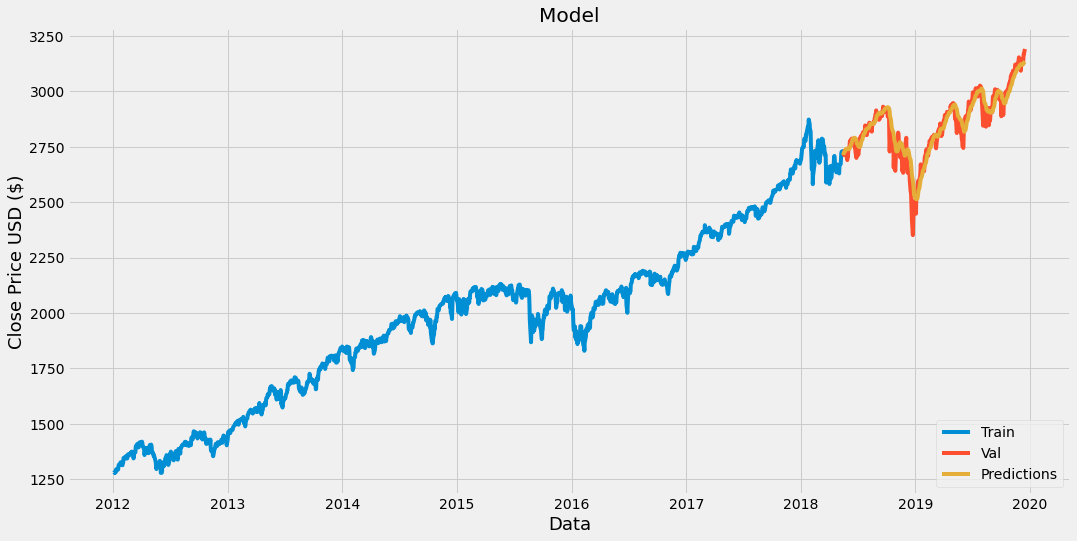

In [92]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show

In [93]:
#Show the valid and prediction prices
valid

,Close,Predictions
Date,,
2018-05-16,2722.459961,2712.730713
2018-05-17,2720.129883,2718.810791
2018-05-18,2712.969971,2723.848145
2018-05-21,2733.010010,2727.406982
2018-05-22,2724.439941,2731.304688
...,...,...
2019-12-10,3132.520020,3122.256836
2019-12-11,3141.629883,3123.776123
2019-12-12,3168.570068,3125.793701


In [94]:
match = 0
for i in valid['Close']:
  for j in valid['Predictions']:
    if ((i + 50) >= j) and ((i - 50) <= j):
      match = match + 1
acc = match / len(valid)
acc

83.925

In [95]:
#Get the quote
SP500_quote = yf.download("^GSPC", start = '2012-01-01', end='2019-12-17')
#Create new dataframe
new_df = SP500_quote.filter(['Close'])
#get the last 60 days closing price values and convert the data frame to an array
last_60_days = new_df[-60:].values
#Scale the data to be value between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days 
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data to be 3D
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scale price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
[[3141.1367]]


In [96]:
#Get the actual quotee
SP500_actual_quote = yf.download('^GSPC', start="2019-12-18", end="2019-12-20")
print(SP500_actual_quote['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2019-12-18    3191.139893
2019-12-19    3205.370117
Name: Close, dtype: float64
